In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pathlib import Path
import seaborn as sns

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
def set_korean_font():
    # ÌôòÍ≤ΩÏóê ÎßûÎäî Ìè∞Ìä∏ Í≤ΩÎ°úÎ•º ÏßÄÏ†ï
    font_paths = [
        "C:/Windows/Fonts/malgun.ttf",  # Windows (ÎßëÏùÄ Í≥†Îîï)
    ]
    for fp in font_paths:
        if Path(fp).exists():
            plt.rc('font', family=fm.FontProperties(fname=fp).get_name())
            break
    plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

set_korean_font()


In [4]:
df = pd.read_csv('alzheimers_disease_data.csv')
df

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
0              13.297218          6.327112     1.347214  ...   
1               4.542524          7.619885     0.518767  ...   
2              19.555085          7.844988     1.826335  ...   
3              12.209266          8.428001     7.435604  ...   
4              18.454356          6.310461     0.795498  ...   
...                  ...               ...          ...  ...   
2144            1.561126          4.049964     6.555306  ...   
2145           18.767261          1.360667     2.904662  ...   
2146            4.594670          9.886002     8.120025  ...   
2147            8.674505          6.354282     1.263427  ...   
2148            7.890703          6.570993     7.941404  ...   

      MemoryComplaints  BehavioralProblems       ADL  Confusion  \
0                    0                   0  1.725883          0   
1                    0                   0  2.592424          0   
2                    0                   0  7.119548          0   
3                    0                   1  6.481226          0   
4                    0                   0  0.014691          0   
...                ...                 ...       ...        ...   
2144                 0                   0  4.492838          1   
2145                 0                   1  9.204952          0   
2146                 0                   0  5.036334          0   
2147                 0                   0  3.785399          0   
2148                 0                   1  8.327563          0   

      Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0                  0                   0                          1   
1                  0                   0                          0   
2                  1                   0                          1   
3                  0                   0                          0   
4                  0                   1                          1   
...              ...                 ...                        ...   
2144               0                   0                          0   
2145               0                   0                          0   
2146               0                   0                          0   
2147               0                   0                          0   
2148               1                   0                          0   

      Forgetfulness  Diagnosis  DoctorInCharge  
0                 0          0       XXXConfid  
1                 1          0       XXXConfid  
2                 0          0       XXXConfid  
3                 0          0       XXXConfid  
4                 0          0       XXXConfid  
...             ...        ...             ...  
2144              0          1       XXXConfid  
2145              0          1       XXXConfid  
2146              0          1       XXXConfid  
2147              1          1       XXXConfid  
2148              1          0       XXXConfid  

[2149 rows x 35 columns]

In [5]:
# ÎÇòÏù¥ÎåÄ Íµ¨Í∞ÑÏùÑ ÏßÄÏ†ï
bins = [59, 69, 79, 89, 150]
labels = ['60s', '70s', '80s', '90s+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Diagnosis Î≥ÑÎ°ú ÎÇòÏù¥ÎåÄ Í∑∏Î£πÏóê Îî∞Îùº ÌèâÍ∑† ÏàòÏπòÎ•º Íµ¨Ìï®
grouped = df.groupby(['Diagnosis', 'AgeGroup']).mean(numeric_only=True)

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ¶¨ (Diagnosis 0, 1 ÎÇòÎà†ÏÑú Í∞ÅÍ∞Å Îî∞Î°ú Î≥¥Í∏∞ ÏúÑÌï¥ unstack)
grouped_transposed = grouped.transpose()
grouped_transposed


C:\Users\use08\AppData\Local\Temp\ipykernel_40452\1761911316.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Diagnosis', 'AgeGroup']).mean(numeric_only=True)


Diagnosis                            0                                         \
AgeGroup                           60s          70s          80s         90s+   
PatientID                  5800.955654  5789.949782  5824.178241  5848.062500   
Age                          64.691796    74.360262    84.597222    90.000000   
Gender                        0.478936     0.532751     0.525463     0.562500   
Ethnicity                     0.660754     0.746725     0.706019     0.812500   
EducationLevel                1.401330     1.301310     1.224537     1.479167   
BMI                          27.873886    27.299273    27.437972    26.897284   
Smoking                       0.279379     0.296943     0.284722     0.375000   
AlcoholConsumption           10.080136    10.060619    10.057201    10.233860   
PhysicalActivity              4.923337     4.926977     4.844462     5.144261   
DietQuality                   5.105720     4.858973     5.003502     4.592697   
SleepQuality                  7.066449     7.096411     7.254090     6.781241   
FamilyHistoryAlzheimers       0.266075     0.275109     0.240741     0.312500   
CardiovascularDisease         0.146341     0.122271     0.136574     0.166667   
Diabetes                      0.139690     0.185590     0.157407     0.104167   
Depression                    0.228381     0.174672     0.201389     0.229167   
HeadInjury                    0.110865     0.100437     0.081019     0.083333   
Hypertension                  0.121951     0.159389     0.131944     0.187500   
SystolicBP                  135.751663   133.676856   134.581019   131.729167   
DiastolicBP                  89.381375    90.550218    89.430556    89.291667   
CholesterolTotal            224.507553   223.726209   227.411224   219.974151   
CholesterolLDL              126.501800   125.134234   124.652199   123.197738   
CholesterolHDL               58.751563    59.297148    57.966903    60.123566   
CholesterolTriglycerides    227.377530   225.436344   229.104049   207.037600   
MMSE                         16.608800    16.149616    16.104340    15.597321   
FunctionalAssessment          5.785728     5.886631     5.890334     6.050097   
MemoryComplaints              0.126386     0.111354     0.108796     0.125000   
BehavioralProblems            0.088692     0.091703     0.104167     0.145833   
ADL                           5.926578     5.702699     5.587971     4.783708   
Confusion                     0.203991     0.216157     0.212963     0.208333   
Disorientation                0.155211     0.161572     0.178241     0.166667   
PersonalityChanges            0.164080     0.137555     0.166667     0.166667   
DifficultyCompletingTasks     0.139690     0.170306     0.159722     0.145833   
Forgetfulness                 0.319290     0.292576     0.296296     0.270833   

Diagnosis                            1                                         
AgeGroup                           60s          70s          80s         90s+  
PatientID                  5866.016000  5905.273469  5823.487179  5714.612903  
Age                          64.284000    74.342857    84.636752    90.000000  
Gender                        0.496000     0.510204     0.478632     0.419355  
Ethnicity                     0.688000     0.644898     0.722222     0.516129  
EducationLevel                1.284000     1.220408     1.205128     1.129032  
BMI                          28.088540    27.173874    28.719926    26.239766  
Smoking                       0.300000     0.273469     0.286325     0.258065  
AlcoholConsumption            9.742047    10.116833    10.054564    10.258549  
PhysicalActivity              4.931021     5.119390     4.789297     4.809698  
DietQuality                   5.247524     4.797950     4.970647     5.473921  
SleepQuality                  6.754652     6.857870     7.082299     7.428476  
FamilyHistoryAlzheimers       0.248000     0.224490     0.235043     0.161290  
CardiovascularDisease         0.152000     0

C:\Users\use08\AppData\Local\Temp\ipykernel_40452\329552883.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\329552883.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\329552883.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\329552883.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\329552883.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\329552883.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `er

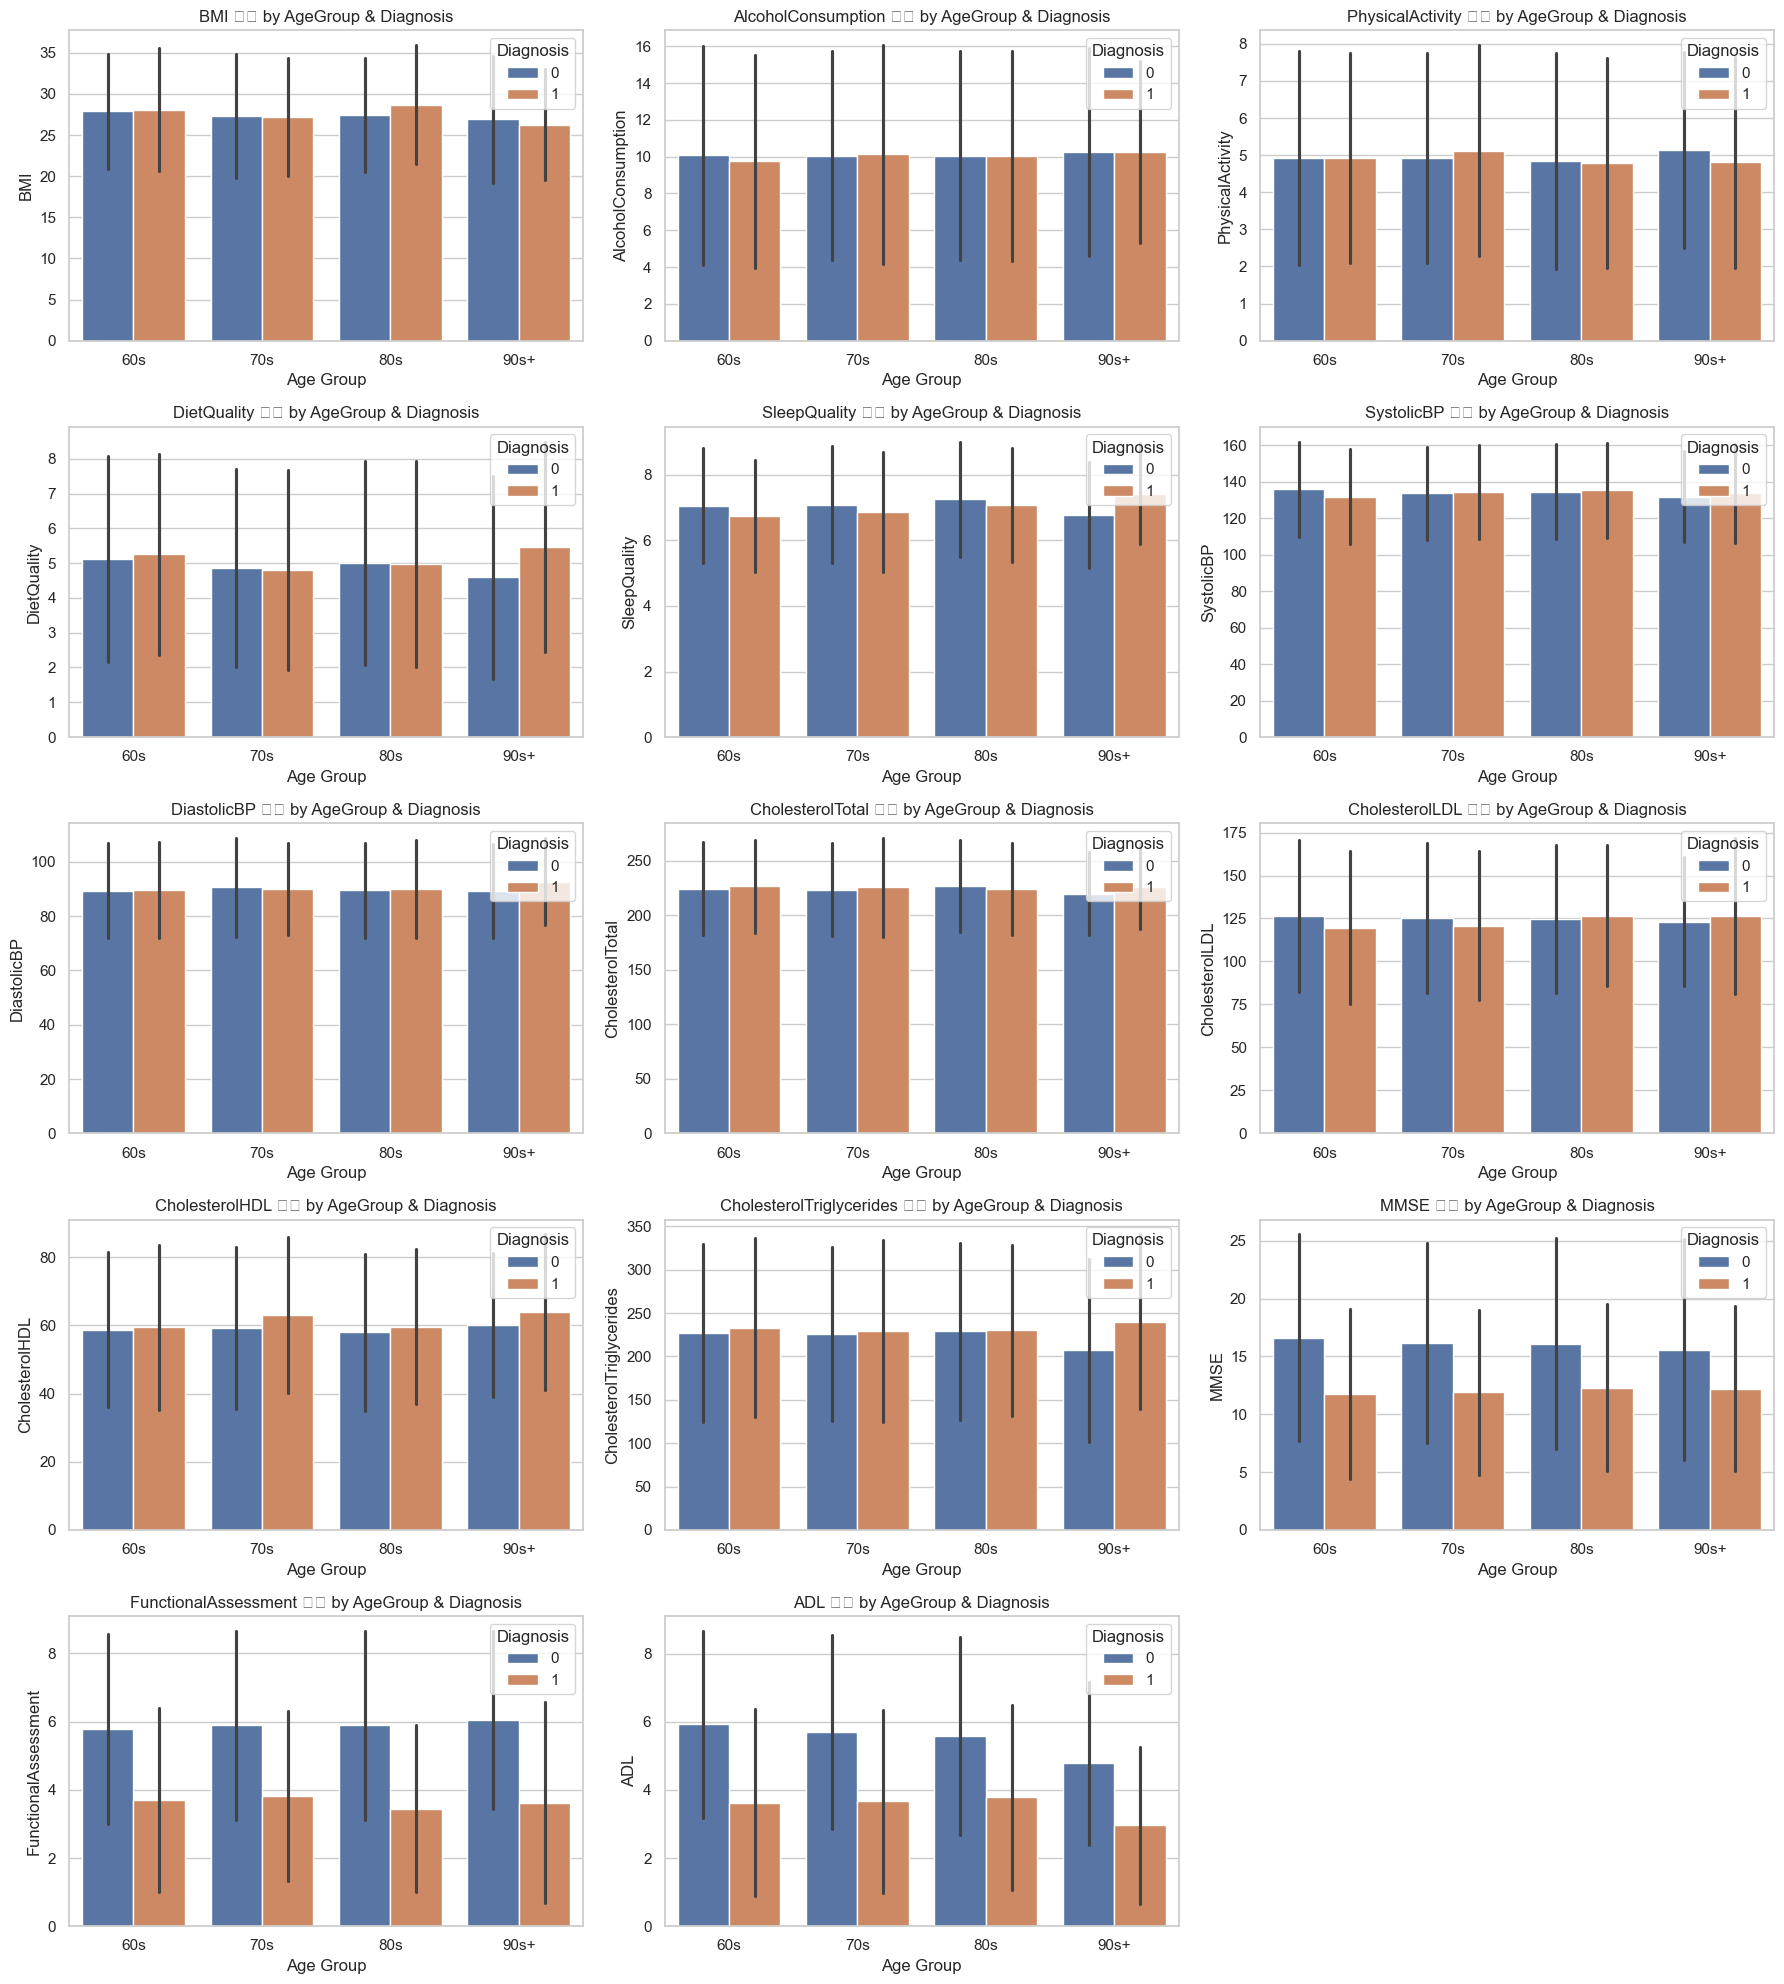

In [6]:


# ÏãúÍ∞ÅÌôîÏóê ÏÇ¨Ïö©Ìï† Ïª¨ÎüºÎßå Ï∂îÏ∂ú (ÏùòÎØ∏ÏûàÎäî Ïó∞ÏÜçÌòï Î≥ÄÏàò Ï§ëÏã¨)
selected_columns = [
    'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
    'MMSE', 'FunctionalAssessment', 'ADL'
]

# ÌîåÎ°Ø ÌÅ¨Í∏∞ ÏÑ§Ï†ï
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
axes = axes.flatten()

# Î≥ÄÏàòÎ≥Ñ ÏãúÍ∞ÅÌôî
for i, col in enumerate(selected_columns):
    ax = axes[i]
    sns.barplot(
        data=df,
        x='AgeGroup',
        y=col,
        hue='Diagnosis',
        estimator='mean',
        ci='sd',
        ax=ax
    )
    ax.set_title(f'{col} ÌèâÍ∑† by AgeGroup & Diagnosis')
    ax.set_ylabel(col)
    ax.set_xlabel('Age Group')
    ax.legend(title='Diagnosis', loc='upper right')

# ÎÇ®ÏùÄ subplot ÎπÑÏö∞Í∏∞
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


| ÏòÅÏñ¥ Î≥ÄÏàòÎ™Ö                      | ÌïúÍ∏Ä Î≤àÏó≠                                 |
| --------------------------- | ------------------------------------- |
| `PatientID`                 | ÌôòÏûê ID                                 |
| `Age`                       | ÎÇòÏù¥                                    |
| `Gender`                    | ÏÑ±Î≥Ñ                                    |
| `Ethnicity`                 | Ïù∏Ï¢Ö                                    |
| `EducationLevel`            | ÍµêÏú° ÏàòÏ§Ä                                 |
| `BMI`                       | Ï≤¥ÏßàÎüâÏßÄÏàò (BMI)                           |
| `Smoking`                   | Ìù°Ïó∞ Ïó¨Î∂Ä                                 |
| `AlcoholConsumption`        | ÏùåÏ£ºÎüâ                                   |
| `PhysicalActivity`          | Ïã†Ï≤¥ÌôúÎèô ÏàòÏ§Ä                               |
| `DietQuality`               | ÏãùÎã®Ïùò Ïßà                                 |
| `SleepQuality`              | ÏàòÎ©¥Ïùò Ïßà                                 |
| `FamilyHistoryAlzheimers`   | ÏïåÏ∏†ÌïòÏù¥Î®∏ Í∞ÄÏ°±Î†•                             |
| `CardiovascularDisease`     | Ïã¨ÌòàÍ¥Ä ÏßàÌôò Ïó¨Î∂Ä                             |
| `Diabetes`                  | ÎãπÎá®Î≥ë Ïó¨Î∂Ä                                |
| `Depression`                | Ïö∞Ïö∏Ï¶ù Ïó¨Î∂Ä                                |
| `HeadInjury`                | ÎëêÎ∂Ä Ïô∏ÏÉÅ Ïó¨Î∂Ä                              |
| `Hypertension`              | Í≥†ÌòàÏïï Ïó¨Î∂Ä                                |
| `SystolicBP`                | ÏàòÏ∂ïÍ∏∞ ÌòàÏïï                                |
| `DiastolicBP`               | Ïù¥ÏôÑÍ∏∞ ÌòàÏïï                                |
| `CholesterolTotal`          | Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§                               |
| `CholesterolLDL`            | LDL ÏΩúÎ†àÏä§ÌÖåÎ°§ (ÎÇòÏÅú ÏΩúÎ†àÏä§ÌÖåÎ°§)                  |
| `CholesterolHDL`            | HDL ÏΩúÎ†àÏä§ÌÖåÎ°§ (Ï¢ãÏùÄ ÏΩúÎ†àÏä§ÌÖåÎ°§)                  |
| `CholesterolTriglycerides`  | Ï§ëÏÑ±ÏßÄÎ∞©                                  |
| `MMSE`                      | Í∞ÑÏù¥ Ï†ïÏã†ÏÉÅÌÉú Í≤ÄÏÇ¨ Ï†êÏàò (MMSE)                  |
| `FunctionalAssessment`      | Í∏∞Îä• ÌèâÍ∞Ä Ï†êÏàò                              |
| `MemoryComplaints`          | Í∏∞ÏñµÎ†• Ï†ÄÌïò Ìò∏ÏÜå                             |
| `BehavioralProblems`        | ÌñâÎèô Î¨∏Ï†ú                                 |
| `ADL`                       | ÏùºÏÉÅÏÉùÌôúÏàòÌñâÎä•Î†• (Activities of Daily Living) |
| `Confusion`                 | ÌòºÎûÄ                                    |
| `Disorientation`            | Î∞©Ìñ•Í∞êÍ∞Å ÏÉÅÏã§                               |
| `PersonalityChanges`        | ÏÑ±Í≤© Î≥ÄÌôî                                 |
| `DifficultyCompletingTasks` | Í≥ºÏ†ú ÏàòÌñâÏùò Ïñ¥Î†§ÏõÄ                            |
| `Forgetfulness`             | Í±¥ÎßùÏ¶ù                                   |
| `Diagnosis`                 | ÏßÑÎã® Ïó¨Î∂Ä (0: Ï†ïÏÉÅ, 1: ÏïåÏ∏†ÌïòÏù¥Î®∏)               |
| `DoctorInCharge`            | Îã¥Îãπ ÏùòÏÇ¨                                 |
| `AgeGroup`                  | ÎÇòÏù¥ÎåÄ (60s, 70s Îì±)                      |


C:\Users\use08\AppData\Local\Temp\ipykernel_40452\1356332666.py:48: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\1356332666.py:48: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\1356332666.py:48: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\1356332666.py:48: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\1356332666.py:48: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\use08\AppData\Local\Temp\ipykernel_40452\1356332666.py:48: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  plt.tight_la

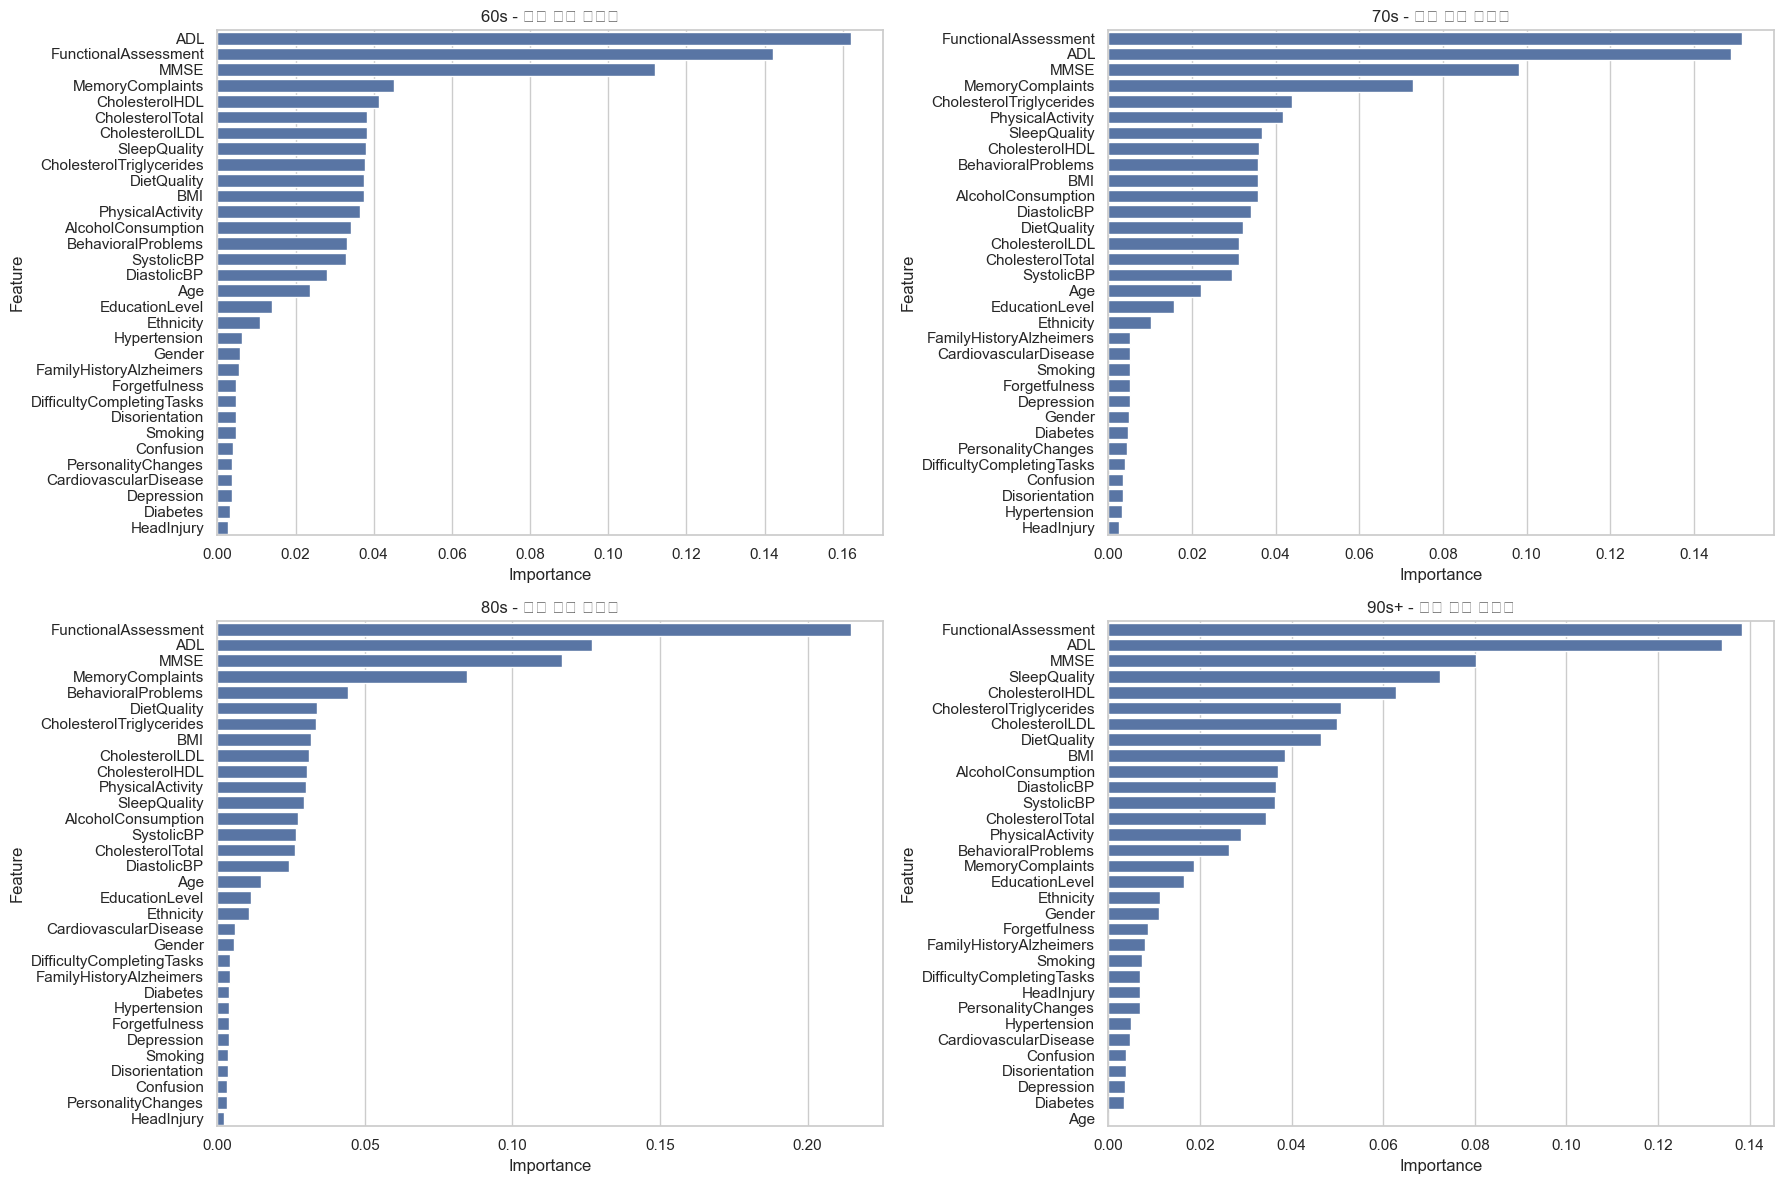

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

# ÏÇ¨Ïö©Ìï† feature: Diagnosis, DoctorInCharge, PatientID, AgeGroupÏùÄ Ï†úÏô∏
feature_cols = df.select_dtypes(include=[np.number]).columns.difference(['Diagnosis', 'PatientID'])
X_all = df[feature_cols]
y_all = df['Diagnosis']

# ÎÇòÏù¥ÎåÄÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
age_groups = df['AgeGroup'].unique().sort_values()
feature_importance_by_age = {}

# ÎÇòÏù¥ÎåÄÎ≥ÑÎ°ú Î™®Îç∏ ÌõàÎ†® Î∞è Ï§ëÏöîÎèÑ Ï†ÄÏû•
for age_group in age_groups:
    subset = df[df['AgeGroup'] == age_group]
    X = subset[feature_cols]
    y = subset['Diagnosis']
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    feature_importance_by_age[age_group] = importance_df

# Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôî Ï§ÄÎπÑ
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, age_group in enumerate(age_groups):
    ax = axes[i]
    sns.barplot(
        data=feature_importance_by_age[age_group],
        x='Importance',
        y='Feature',
        ax=ax
    )
    ax.set_title(f'{age_group} - Ï£ºÏöî Î≥ÄÏàò Ï§ëÏöîÎèÑ')

plt.tight_layout()
plt.show()


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Ï§ëÏöîÎèÑ ÌïòÏúÑ Î≥ÄÏàòÎì§ÏùÑ 1Í∞úÎ∂ÄÌÑ∞ 9Í∞úÍπåÏßÄ Ï†êÏßÑÏ†ÅÏúºÎ°ú Ï∂îÍ∞ÄÌïòÎ©∞ ÏÑ±Îä• Ï∏°Ï†ï
tail_feature_progressive_eval = []

for age_group in age_groups:
    subset = df[df['AgeGroup'] == age_group]
    y = subset['Diagnosis']
    
    # ÌïòÏúÑ Ï§ëÏöîÎèÑ 9Í∞ú Î≥ÄÏàò
    tail_features = feature_importance_by_age[age_group].tail(9)['Feature'].tolist()
    
    for i in range(1, len(tail_features)+1):
        selected = tail_features[:i]
        X = subset[selected]
        
        # train/test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y)
        
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        tail_feature_progressive_eval.append({
            'AgeGroup': age_group,
            'NumFeatures': i,
            'FeaturesUsed': ', '.join(selected),
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': f1
        })

# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
tail_progressive_df = pd.DataFrame(tail_feature_progressive_eval)
tail_progressive_df



AgeGroup  NumFeatures                                       FeaturesUsed  \
0       60s            1                          DifficultyCompletingTasks   
1       60s            2          DifficultyCompletingTasks, Disorientation   
2       60s            3  DifficultyCompletingTasks, Disorientation, Smo...   
3       60s            4  DifficultyCompletingTasks, Disorientation, Smo...   
4       60s            5  DifficultyCompletingTasks, Disorientation, Smo...   
5       60s            6  DifficultyCompletingTasks, Disorientation, Smo...   
6       60s            7  DifficultyCompletingTasks, Disorientation, Smo...   
7       60s            8  DifficultyCompletingTasks, Disorientation, Smo...   
8       60s            9  DifficultyCompletingTasks, Disorientation, Smo...   
9       70s            1                                         Depression   
10      70s            2                                 Depression, Gender   
11      70s            3                       Depression, Gender, Diabetes   
12      70s            4   Depression, Gender, Diabetes, PersonalityChanges   
13      70s            5  Depression, Gender, Diabetes, PersonalityChang...   
14      70s            6  Depression, Gender, Diabetes, PersonalityChang...   
15      70s            7  Depression, Gender, Diabetes, PersonalityChang...   
16      70s            8  Depression, Gender, Diabetes, PersonalityChang...   
17      70s            9  Depression, Gender, Diabetes, PersonalityChang...   
18      80s            1                                           Diabetes   
19      80s            2                             Diabetes, Hypertension   
20      80s            3              Diabetes, Hypertension, Forgetfulness   
21      80s            4  Diabetes, Hypertension, Forgetfulness, Depression   
22      80s            5  Diabetes, Hypertension, Forgetfulness, Depress...   
23      80s            6  Diabetes, Hypertension, Forgetfulness, Depress...   
24      80s            7  Diabetes, Hypertension, Forgetfulness, Depress...   
25      80s            8  Diabetes, Hypertension, Forgetfulness, Depress...   
26      80s            9  Diabetes, Hypertension, Forgetfulness, Depress...   
27     90s+            1                                         HeadInjury   
28     90s+            2                     HeadInjury, PersonalityChanges   
29     90s+            3       HeadInjury, PersonalityChanges, Hypertension   
30     90s+            4  HeadInjury, PersonalityChanges, Hypertension, ...   
31     90s+            5  HeadInjury, PersonalityChanges, Hypertension, ...   
32     90s+            6  HeadInjury, PersonalityChanges, Hypertension, ...   
33     90s+            7  HeadInjury, PersonalityChanges, Hypertension, ...   
34     90s+            8  HeadInjury, PersonalityChanges, Hypertension, ...   
35     90s+            9  HeadInjury, PersonalityChanges, Hypertension, ...   

    Accuracy  Precision    Recall  F1 Score  
0   0.644550   0.000000  0.000000  0.000000  
1   0.644550   0.000000  0.000000  0.000000  
2   0.644550   0.000000  0.000000  0.000000  
3   0.597156   0.187500  0.040000  0.065934  
4   0.592417   0.176471  0.040000  0.065217  
5   0.601896   0.200000  0.040000  0.066667  
6   0.592417   0.296296  0.106667  0.156863  
7   0.578199   0.281250  0.120000  0.168224  
8   0.592417   0.322581  0.133333  0.188679  
9   0.649289   0.000000  0.000000  0.000000  
10  0.649289   0.000000  0.000000  0.000000  
11  0.649289   0.000000  0.000000  0.000000  
12  0.649289   0.000000  0.000000  0.000000  
13  0.649289   0.500000  0.135135  0.212766  
14  0.658768   0.583333  0.094595  0.162791  
15  0.644550   0.476190  0.135135  0.210526  
16  0.658768   0.541667  0.175676  0.265306  
17  0.654028   0.520000  0.175676  0.262626  
18  0.650000   0.000000  0.000000  0.000000  
19  0.600000   0.272727  0.085714  0.130435  
20  0.590000   0.166667  0.042857  0.068182  
21  0.615000   0.266667  0.057143  0.094118  
22  0.625000   0.2727

In [5]:
# ÏΩîÎìú Ïã§Ìñâ ÏÉÅÌÉúÍ∞Ä Ï¥àÍ∏∞ÌôîÎêòÏóàÏúºÎØÄÎ°ú ÌååÏùºÏùÑ Îã§Ïãú Î∂àÎü¨Ïò§Í≥† ÌïÑÏöîÌïú Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ÌååÏùº Ïû¨Î°úÎìú
file_path = "alzheimers_disease_data.csv"
df = pd.read_csv(file_path)

# ÏÇ¨Ïö©Ìï† Î≥ÄÏàò Î¶¨Ïä§Ìä∏
selected_columns = [
    'Gender', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality',
    'FamilyHistoryAlzheimers', 'CholesterolTriglycerides',
    'DietQuality', 'BMI', 'MemoryComplaints', 'Diagnosis'
]

# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
df_selected = df[selected_columns].copy()

# ÌäπÏÑ±Í≥º ÌÉÄÍ≤ü Î∂ÑÎ¶¨
X = df_selected.drop(columns='Diagnosis')
y = df_selected['Diagnosis']

# ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Í≤∞Ï†ïÌä∏Î¶¨ Î™®Îç∏ ÌïôÏäµ
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä Î¶¨Ìè¨Ìä∏
report = classification_report(y_test, y_pred)

# Ï∂úÎ†•
print("üéØ Í≤∞Ï†ïÌä∏Î¶¨ Î∂ÑÎ•ò ÏÑ±Îä• ÏöîÏïΩ\n")
print(report)


üéØ Í≤∞Ï†ïÌä∏Î¶¨ Î∂ÑÎ•ò ÏÑ±Îä• ÏöîÏïΩ

              precision    recall  f1-score   support

           0       0.69      0.88      0.78       417
           1       0.57      0.29      0.39       228

    accuracy                           0.67       645
   macro avg       0.63      0.59      0.58       645
weighted avg       0.65      0.67      0.64       645



In [6]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# ÌäπÏÑ± Î∞è ÌÉÄÍ≤ü ÏßÄÏ†ï
X = df[['Gender', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality',
        'FamilyHistoryAlzheimers', 'CholesterolTriglycerides',
        'DietQuality', 'BMI', 'MemoryComplaints']]
y = df['Diagnosis']

# train/test Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Î™®Îç∏ ÌïôÏäµ
model = LGBMClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä Ï∂úÎ†•
print("üéØ LGBM Î∂ÑÎ•ò ÏÑ±Îä• ÏöîÏïΩ\n")
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 532, number of negative: 972
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1536
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
üéØ LGBM Î∂ÑÎ•ò ÏÑ±Îä• ÏöîÏïΩ

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       417
           1       0.45      0.39      0.42       228

    accuracy                           0.62       645
   macro avg       0.57      0.57      0.57       645
weighted avg       0.61      0.62      0.61       645



In [12]:
# XGBoost Îã®ÎèÖ Î™®Îç∏Î°ú ÌïôÏäµ + Í≤∞Í≥º Î≥¥Í∏∞ Ìé∏ÌïòÍ≤å Ï∂úÎ†•

from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# ÌäπÏÑ±Í≥º ÌÉÄÍ≤ü ÏÑ§Ï†ï
selected_columns = [
    'Gender', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality',
    'FamilyHistoryAlzheimers', 'CholesterolTriglycerides',
    'DietQuality', 'BMI', 'MemoryComplaints', 'Diagnosis'
]

df_selected = df[selected_columns].copy()
X = df_selected.drop(columns='Diagnosis')
y = df_selected['Diagnosis']

# ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# XGBoost Î™®Îç∏ Ï†ïÏùò (Î∂àÌïÑÏöîÌïú use_label_encoder Ï†úÍ±∞)
xgb_clf = XGBClassifier(scale_pos_weight=2, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

# ÏÑ±Îä• Î¶¨Ìè¨Ìä∏ ÏÉùÏÑ±
report = classification_report(y_test, y_pred)
print("üéØ XGBoost Î∂ÑÎ•ò ÏÑ±Îä• ÏöîÏïΩ (MemoryComplaints ÏûàÏùå)\n")
print(report)


üéØ XGBoost Î∂ÑÎ•ò ÏÑ±Îä• ÏöîÏïΩ (MemoryComplaints ÏûàÏùå)

              precision    recall  f1-score   support

           0       0.70      0.80      0.75       417
           1       0.51      0.37      0.43       228

    accuracy                           0.65       645
   macro avg       0.60      0.59      0.59       645
weighted avg       0.63      0.65      0.63       645



##### Ïôú ÏïåÏ∏†ÌïòÏù¥Î®∏Î•º Ïû°ÏßÄ Î™ªÌï†Íπå? Ïä§ÏºÄÏùºÎßÅÏùÑ Ìï¥Î≥¥Ïûê!

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("alzheimers_disease_data.csv")

# ÏÇ¨Ïö©Ìï† Î≥ÄÏàòÎì§
features = [
    'Gender', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality',
    'FamilyHistoryAlzheimers', 'CholesterolTriglycerides',
    'DietQuality', 'BMI', 'MemoryComplaints'
]
X = df[features]
y = df['Diagnosis']

# train/test Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Î™®Îç∏ Ï†ïÏùò (Ïä§ÏºÄÏùº Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞Ïö©)
log_clf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
xgb_clf = XGBClassifier(scale_pos_weight=2, eval_metric='logloss', random_state=42, use_label_encoder=False)

voting_clf_scaled = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('svm', svm_clf), ('xgb', xgb_clf)],
    voting='soft'
)

# ÌïôÏäµ Î∞è ÏòàÏ∏°
voting_clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = voting_clf_scaled.predict(X_test_scaled)

# ÏÑ±Îä• Î¶¨Ìè¨Ìä∏ Ï∂úÎ†•
print("üéØ Ïä§ÏºÄÏùºÎßÅ Ï†ÅÏö© ÏïôÏÉÅÎ∏î Î∂ÑÎ•ò ÏÑ±Îä• ÏöîÏïΩ(ÏÇ¨Ïö© Î™®Îç∏ : Î°úÏßÄÏä§Ìã±ÌöåÍ∑Ä, ÎûúÎç§Ìè¨Î†àÏä§Ìä∏, SVC, XGBoost)\n")
print(classification_report(y_test, y_pred_scaled))


c:\Users\use08\anaconda3\envs\ml_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:05:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


üéØ Ïä§ÏºÄÏùºÎßÅ Ï†ÅÏö© ÏïôÏÉÅÎ∏î Î∂ÑÎ•ò ÏÑ±Îä• ÏöîÏïΩ(ÏÇ¨Ïö© Î™®Îç∏ : Î°úÏßÄÏä§Ìã±ÌöåÍ∑Ä, ÎûúÎç§Ìè¨Î†àÏä§Ìä∏, SVC, XGBoost)

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       417
           1       0.56      0.32      0.41       228

    accuracy                           0.67       645
   macro avg       0.63      0.59      0.59       645
weighted avg       0.65      0.67      0.64       645



##### Í∞íÏùò Î≥ÄÌôîÍ∞Ä ÏÜåÌè≠ ÏÉÅÏäπÌñàÏßÄÎ®º, Í∑∏ÎûòÎèÑ ÏàòÏπòÍ∞Ä ÎÇÆÏùå. Î≥ÄÏàòÎì§Í∞ÑÏùò Î¨∏Ï†úÎ°ú ÏÉùÍ∞Å. Îî∞ÎùºÏÑú ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÏùÑ ÌÜµÌï¥ ÏÉàÎ°úÏö¥ Î≥ÄÏàò ÏÉùÏÑ± Îí§ Í≤∞Í≥ºÍ∞í ÌôïÏù∏

- LDL_HDL_ratio: ÎÇòÏÅú ÏΩúÎ†àÏä§ÌÖåÎ°§(LDL) ÎåÄÎπÑ Ï¢ãÏùÄ ÏΩúÎ†àÏä§ÌÖåÎ°§(HDL) ÎπÑÏú®

- TG_HDL_ratio: Ï§ëÏÑ±ÏßÄÎ∞© ÎåÄÎπÑ Ï¢ãÏùÄ ÏΩúÎ†àÏä§ÌÖåÎ°§ ÎπÑÏú®

- BMI_category: BMIÎ•º Í∏∞Ï§ÄÏúºÎ°ú ‚ÄòUnderweight‚Äô, ‚ÄòNormal‚Äô, ‚ÄòOverweight‚Äô, ‚ÄòObese‚ÄôÎ°ú Íµ¨Î∂Ñ

- PA_Diet_interaction: Ïã†Ï≤¥ÌôúÎèô √ó ÏãùÎã®Ïùò Ïßà ÏÉÅÌò∏ÏûëÏö©

- MemSleep_interaction: Í∏∞ÏñµÎ†• Ï†ÄÌïò Ìò∏ÏÜå √ó ÏàòÎ©¥Ïùò Ïßà ÏÉÅÌò∏ÏûëÏö©

- BP_diff: ÏàòÏ∂ïÍ∏∞ÌòàÏïï ‚Äì Ïù¥ÏôÑÍ∏∞ÌòàÏïï

- Hypertension_flag: Í≥†ÌòàÏïï Ïó¨Î∂Ä(140/90 Í∏∞Ï§Ä)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


# 2. ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ
df['LDL_HDL_ratio'] = df['CholesterolLDL'] / df['CholesterolHDL']
df['TG_HDL_ratio'] = df['CholesterolTriglycerides'] / df['CholesterolHDL']
df['PA_Diet_interaction'] = df['PhysicalActivity'] * df['DietQuality']
df['MemSleep_interaction'] = df['MemoryComplaints'] * df['SleepQuality']
df['BP_diff'] = df['SystolicBP'] - df['DiastolicBP']
df['Hypertension_flag'] = ((df['SystolicBP'] >= 140) | (df['DiastolicBP'] >= 90)).astype(int)
df['BMI_category'] = pd.cut(
    df['BMI'],
    bins=[0, 18.5, 25, 30, df['BMI'].max()],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

# 3. Î≤îÏ£ºÌòï Ïù∏ÏΩîÎî© (BMI_category)
df = pd.get_dummies(df, columns=['BMI_category'], drop_first=True)

# 4. ÏûÖÎ†• Î≥ÄÏàò Ï†ïÏùò
feature_cols = [
    'Gender', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality',
    'FamilyHistoryAlzheimers', 'CholesterolTriglycerides',
    'DietQuality', 'BMI', 'MemoryComplaints',
    'LDL_HDL_ratio', 'TG_HDL_ratio', 'PA_Diet_interaction',
    'MemSleep_interaction', 'BP_diff', 'Hypertension_flag'
]
feature_cols += [col for col in df.columns if col.startswith('BMI_category_')]

X = df[feature_cols]
y = df['Diagnosis']

# 5. train/test Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6. Ïä§ÏºÄÏùºÎßÅ (Logistic, SVMÏóê Ïú†Î¶¨)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Í∞úÎ≥Ñ Î™®Îç∏ Ï†ïÏùò
log_clf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb_clf = XGBClassifier(scale_pos_weight=pos_weight, eval_metric='logloss', random_state=42)

# 8. Voting ÏïôÏÉÅÎ∏î Íµ¨ÏÑ±
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('svm', svm_clf), ('xgb', xgb_clf)],
    voting='soft'
)

# 9. ÌïôÏäµ Î∞è ÏòàÏ∏°
voting_clf.fit(X_train_scaled, y_train)
y_pred = voting_clf.predict(X_test_scaled)

# 10. ÏÑ±Îä• Ï∂úÎ†•
print("üéØ Engineered Features Í∏∞Î∞ò ÏïôÏÉÅÎ∏î Î∂ÑÎ•ò ÏÑ±Îä• ÏöîÏïΩ(ÏÇ¨Ïö©Î™®Îç∏ : Î°úÏßÄÏä§Ìã±ÌöåÍ∑Ä, ÎûúÎç§Ìè¨Î†àÏä§Ìä∏, SVC, XGBoost)\n")
print(classification_report(y_test, y_pred))


üéØ Engineered Features Í∏∞Î∞ò ÏïôÏÉÅÎ∏î Î∂ÑÎ•ò ÏÑ±Îä• ÏöîÏïΩ(ÏÇ¨Ïö©Î™®Îç∏ : Î°úÏßÄÏä§Ìã±ÌöåÍ∑Ä, ÎûúÎç§Ìè¨Î†àÏä§Ìä∏, SVC, XGBoost)

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       417
           1       0.58      0.32      0.41       228

    accuracy                           0.68       645
   macro avg       0.64      0.59      0.59       645
weighted avg       0.66      0.68      0.65       645



üéØ RandomForest Feature Importances:

FunctionalAssessment: 0.1866
ADL: 0.1558
MMSE: 0.1287
MemoryComplaints: 0.0842
BehavioralProblems: 0.0515
BMI: 0.0316
DietQuality: 0.0310
SleepQuality: 0.0297
PhysicalActivity: 0.0293
CholesterolTriglycerides: 0.0293
AlcoholConsumption: 0.0281
CholesterolHDL: 0.0267
CholesterolTotal: 0.0266
DiastolicBP: 0.0251
CholesterolLDL: 0.0249
SystolicBP: 0.0246
Age: 0.0245
EducationLevel: 0.0112
Ethnicity: 0.0066
FamilyHistoryAlzheimers: 0.0049
PersonalityChanges: 0.0039
Confusion: 0.0038
Smoking: 0.0036
Forgetfulness: 0.0036
CardiovascularDisease: 0.0036
Depression: 0.0036
Gender: 0.0034
Hypertension: 0.0033
DifficultyCompletingTasks: 0.0031
Disorientation: 0.0027
HeadInjury: 0.0024
Diabetes: 0.0022


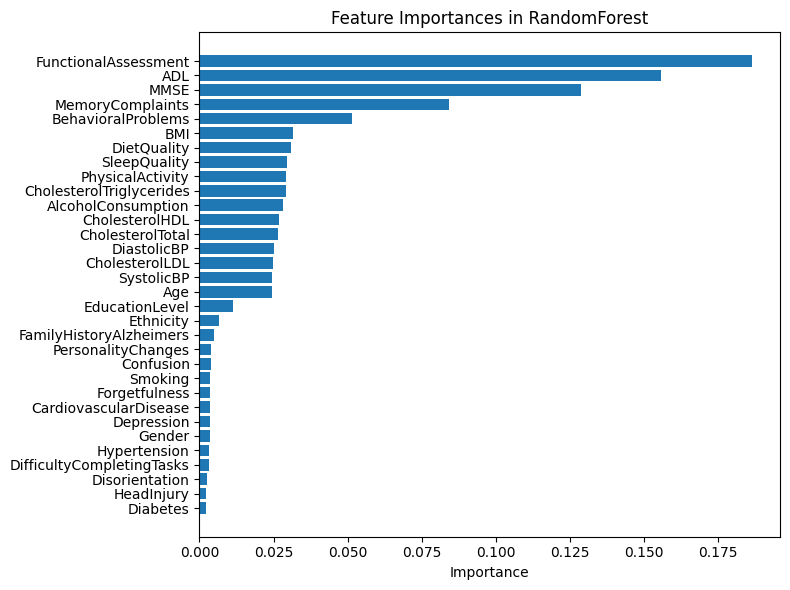

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("alzheimers_disease_data.csv")

# 2. Ïà´ÏûêÌòï ÌîºÏ≤òÎßå Ï∂îÏ∂ú, 'Diagnosis'ÏôÄ 'PatientID' Ï†úÏô∏
feature_cols = df.select_dtypes(include=[np.number]).columns.difference(['Diagnosis', 'PatientID'])
X = df[feature_cols]
y = df['Diagnosis']

# 3. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. RandomForest Î™®Îç∏ ÌïôÏäµ
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# 5. Î≥ÄÏàò Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
top10 = importances

# 6. Ïà´Ïûê Í∞íÏúºÎ°ú Ï∂úÎ†•
print("üéØ RandomForest Feature Importances:\n")
for feature, imp in top10.items():
    print(f"{feature}: {imp:.4f}")

# 7. Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top10.index[::-1], top10.values[::-1])
ax.set_xlabel('Importance')
ax.set_title('Feature Importances in RandomForest')
plt.tight_layout()
plt.show()



--- Threshold: 0.10 ---
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       417
           1      0.353     1.000     0.522       228

    accuracy                          0.353       645
   macro avg      0.177     0.500     0.261       645
weighted avg      0.125     0.353     0.185       645


--- Threshold: 0.15 ---
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       417
           1      0.353     1.000     0.522       228

    accuracy                          0.353       645
   macro avg      0.177     0.500     0.261       645
weighted avg      0.125     0.353     0.185       645


--- Threshold: 0.20 ---
              precision    recall  f1-score   support

           0      0.650     0.031     0.059       417
           1      0.354     0.969     0.518       228

    accuracy                          0.363       645
   macro avg      0.502     0.500     0.289       645

c:\Users\use08\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\use08\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\use08\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

              precision    recall  f1-score   support

           0      0.704     0.854     0.771       417
           1      0.561     0.342     0.425       228

    accuracy                          0.673       645
   macro avg      0.632     0.598     0.598       645
weighted avg      0.653     0.673     0.649       645


--- Threshold: 0.55 ---
              precision    recall  f1-score   support

           0      0.694     0.882     0.777       417
           1      0.574     0.289     0.385       228

    accuracy                          0.673       645
   macro avg      0.634     0.586     0.581       645
weighted avg      0.652     0.673     0.638       645


--- Threshold: 0.60 ---
              precision    recall  f1-score   support

           0      0.693     0.909     0.786       417
           1      0.612     0.263     0.368       228

    accuracy                          0.681       645
   macro avg      0.653     0.586     0.577       645
weighted avg      0.664 

c:\Users\use08\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\use08\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\use08\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


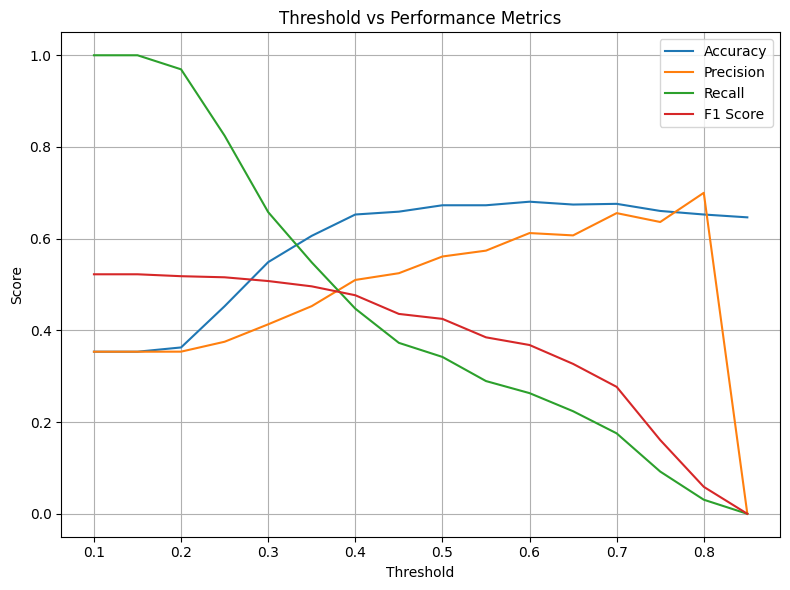

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. CSV ÌååÏùº Î°úÎìú
df = pd.read_csv("alzheimers_disease_data.csv")

# 2. (ÌïÑÏöî Ïãú) BMI_category ÎçîÎØ∏ ÏÉùÏÑ±
if 'BMI_category' in df.columns:
    df = pd.get_dummies(df, columns=['BMI_category'], drop_first=True)

# 3. ÏûÖÎ†• Î≥ÄÏàò Ï†ïÏùò
base_features = [
    'Gender', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality',
    'FamilyHistoryAlzheimers', 'CholesterolTriglycerides', 'DietQuality',
    'BMI', 'MemoryComplaints'
]
bmi_dummies = [col for col in df.columns if col.startswith('BMI_category_')]
features = base_features + bmi_dummies

X = df[features]
y = df['Diagnosis']

# 4. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï† Î∞è Ïä§ÏºÄÏùºÎßÅ
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. ÏïôÏÉÅÎ∏î Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
log_clf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb_clf = XGBClassifier(scale_pos_weight=pos_weight, eval_metric='logloss', random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('svm', svm_clf), ('xgb', xgb_clf)],
    voting='soft'
)
voting_clf.fit(X_train_scaled, y_train)

# 6. ÏûÑÍ≥ÑÍ∞íÎ≥Ñ ÌôïÎ•† ÏòàÏ∏° Î∞è ÏÑ±Îä• Í≥ÑÏÇ∞
y_proba = voting_clf.predict_proba(X_test_scaled)[:, 1]
thresholds = np.arange(0.1, 0.9, 0.05)
metrics = []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    print(f"\n--- Threshold: {t:.2f} ---")
    print(classification_report(y_test, y_pred, digits=3))
    metrics.append({
        'threshold': t,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, zero_division=0),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    })

metrics_df = pd.DataFrame(metrics)

# 7. Í≤∞Í≥º Ï∂úÎ†• (Ìëú + Í∑∏ÎûòÌîÑ)
print("\nüéØ Threshold Ï°∞Ï†ïÏóê Îî∞Î•∏ Performance Metrics\n")
print(metrics_df.to_string(index=False, formatters={
    'threshold': '{:.2f}'.format,
    'accuracy': '{:.3f}'.format,
    'precision': '{:.3f}'.format,
    'recall': '{:.3f}'.format,
    'f1_score': '{:.3f}'.format
}))

plt.figure(figsize=(8,6))
plt.plot(metrics_df['threshold'], metrics_df['accuracy'], label='Accuracy')
plt.plot(metrics_df['threshold'], metrics_df['precision'], label='Precision')
plt.plot(metrics_df['threshold'], metrics_df['recall'], label='Recall')
plt.plot(metrics_df['threshold'], metrics_df['f1_score'], label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Performance Metrics')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


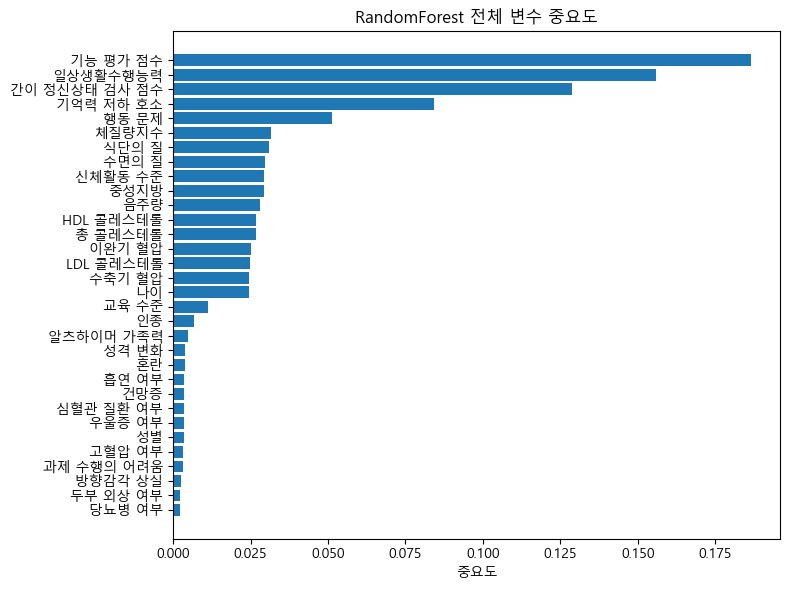

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1) CSV ÌååÏùº Î°úÎìú (Í≤ΩÎ°úÎßå ÏïåÎßûÍ≤å ÏàòÏ†ïÌïòÏÑ∏Ïöî)
df = pd.read_csv("alzheimers_disease_data.csv")

# 2) Ïà´ÏûêÌòï ÌîºÏ≤òÎßå Í≥®ÎùºÎÇ¥Í≥†, ÏßÑÎã®¬∑ID Ïó¥ÏùÄ Ï†úÏô∏
feature_cols = df.select_dtypes(include=[np.number]).columns.difference(['Diagnosis', 'PatientID'])
X = df[feature_cols]
y = df['Diagnosis']

# 3) ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4) RandomForest ÌïôÏäµ
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# 5) Î≥ÄÏàò Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞ Î∞è Ï†ïÎ†¨
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values()

# 6) ÏòÅÏñ¥‚ÜíÌïúÍ∏Ä Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨
mapping = {
    'Age':'ÎÇòÏù¥','Gender':'ÏÑ±Î≥Ñ','Ethnicity':'Ïù∏Ï¢Ö','EducationLevel':'ÍµêÏú° ÏàòÏ§Ä',
    'BMI':'Ï≤¥ÏßàÎüâÏßÄÏàò','Smoking':'Ìù°Ïó∞ Ïó¨Î∂Ä','AlcoholConsumption':'ÏùåÏ£ºÎüâ',
    'PhysicalActivity':'Ïã†Ï≤¥ÌôúÎèô ÏàòÏ§Ä','DietQuality':'ÏãùÎã®Ïùò Ïßà','SleepQuality':'ÏàòÎ©¥Ïùò Ïßà',
    'FamilyHistoryAlzheimers':'ÏïåÏ∏†ÌïòÏù¥Î®∏ Í∞ÄÏ°±Î†•','CardiovascularDisease':'Ïã¨ÌòàÍ¥Ä ÏßàÌôò Ïó¨Î∂Ä',
    'Diabetes':'ÎãπÎá®Î≥ë Ïó¨Î∂Ä','Depression':'Ïö∞Ïö∏Ï¶ù Ïó¨Î∂Ä','HeadInjury':'ÎëêÎ∂Ä Ïô∏ÏÉÅ Ïó¨Î∂Ä',
    'Hypertension':'Í≥†ÌòàÏïï Ïó¨Î∂Ä','SystolicBP':'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï','DiastolicBP':'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'CholesterolTotal':'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§','CholesterolLDL':'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'CholesterolHDL':'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§','CholesterolTriglycerides':'Ï§ëÏÑ±ÏßÄÎ∞©',
    'MMSE':'Í∞ÑÏù¥ Ï†ïÏã†ÏÉÅÌÉú Í≤ÄÏÇ¨ Ï†êÏàò','FunctionalAssessment':'Í∏∞Îä• ÌèâÍ∞Ä Ï†êÏàò',
    'MemoryComplaints':'Í∏∞ÏñµÎ†• Ï†ÄÌïò Ìò∏ÏÜå','BehavioralProblems':'ÌñâÎèô Î¨∏Ï†ú',
    'ADL':'ÏùºÏÉÅÏÉùÌôúÏàòÌñâÎä•Î†•','Confusion':'ÌòºÎûÄ','Disorientation':'Î∞©Ìñ•Í∞êÍ∞Å ÏÉÅÏã§',
    'PersonalityChanges':'ÏÑ±Í≤© Î≥ÄÌôî','DifficultyCompletingTasks':'Í≥ºÏ†ú ÏàòÌñâÏùò Ïñ¥Î†§ÏõÄ',
    'Forgetfulness':'Í±¥ÎßùÏ¶ù'
}

# 7) ÌïúÍ∏Ä Ïù¥Î¶Ñ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
korean_names = [mapping.get(feat, feat) for feat in importances.index]

# 8) Ï†ÑÏ≤¥ Î≥ÄÏàò Ï§ëÏöîÎèÑ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(8, 6))
plt.barh(korean_names, importances.values)
plt.xlabel('Ï§ëÏöîÎèÑ')
plt.title('RandomForest Ï†ÑÏ≤¥ Î≥ÄÏàò Ï§ëÏöîÎèÑ')
plt.tight_layout()
plt.show()


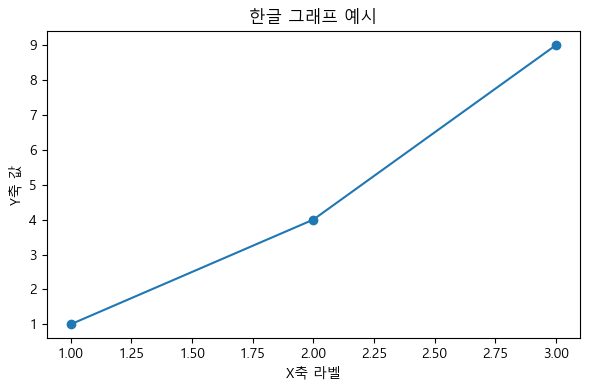

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pathlib import Path

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï Ìï®Ïàò
def set_korean_font():
    # ÌôòÍ≤ΩÎ≥Ñ ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°ú
    font_paths = [
        "C:/Windows/Fonts/malgun.ttf",                     # Windows
        "/usr/share/fonts/truetype/nanum/NanumGothic.ttf", # Linux
        "/System/Library/Fonts/AppleSDGothicNeo.ttc"       # macOS
    ]
    for font_path in font_paths:
        if Path(font_path).exists():
            font_prop = fm.FontProperties(fname=font_path)
            plt.rc('font', family=font_prop.get_name())
            break
    plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

# Ìè∞Ìä∏ ÏÑ§Ï†ï Ï†ÅÏö©
set_korean_font()

# ÏÉòÌîå Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(6,4))
plt.plot([1, 2, 3], [1, 4, 9], marker='o')
plt.title('ÌïúÍ∏Ä Í∑∏ÎûòÌîÑ ÏòàÏãú')
plt.xlabel('XÏ∂ï ÎùºÎ≤®')
plt.ylabel('YÏ∂ï Í∞í')
plt.tight_layout()
plt.show()
